In [1]:
import pandas as pd

In [6]:
#df = pd.read_csv('gapminder.tsv')
df = pd.read_csv('gapminder.tsv', sep = '\t')
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [7]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [15]:
#Shape: 
print(df.shape)
#Envolve uma tupla -> (linha,coluna)
#É um ATRIBUTO, não um MÉTODO ou FUNÇÃO -> não possui parênteses após o ponto
#Bom de saber para se ter uma noção do tamanho e quais informações
print('\n')
#Columns: Exibe as colunas e seus rótulos
print(df.columns)



(1704, 6)


Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')


In [24]:
#Acessando os dados de um arquivo.
#Interessante ver parte a parte, pois em dataframes muito
#grandes fica inviável obsersar tudo de uma vez

country_df = df['country']
print(country_df.head())
print('\n')
#No pandas: abject -> string
print(country_df.tail())
print('\n')

#Para ver várias colunas utilizamos Listas
subset = df[['country', 'continent', 'year']]
print(subset.head())
print('\n')
print(subset.tail())

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object


1699    Zimbabwe
1700    Zimbabwe
1701    Zimbabwe
1702    Zimbabwe
1703    Zimbabwe
Name: country, dtype: object


       country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
3  Afghanistan      Asia  1967
4  Afghanistan      Asia  1972


       country continent  year
1699  Zimbabwe    Africa  1987
1700  Zimbabwe    Africa  1992
1701  Zimbabwe    Africa  1997
1702  Zimbabwe    Africa  2002
1703  Zimbabwe    Africa  2007


In [40]:
#Obtendo subconjuntos de linhas
#loc -> encontra utilizando o nome da linha
#iloc -> encontra utilizando o numero da linha

print('\n')
print(df.head())
print('\n')

print(df.loc[0])
print('\n')

print(df.loc[99])
print('\n')

#Não funciona como nas listas "padrão" de python 
#print(df.loc[-1])

#precisa desenvolver um pouco mais:
linhas = df.shape[0]
ultima_linha = linhas - 1
print(df.loc[ultima_linha])
print('\n')
#Também é possível fazer via Tail
print(df.tail(n=0))
print('\n')

UTILIZANDO O LOC:


       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106


country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap     779.445314
Name: 0, dtype: object


country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap    721.186086
Name: 99, dtype: object


country        Zimbabwe
continent        Africa
year               2007
lifeExp          43.487
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object


Empty DataFrame
Columns: [country, continent, year, lifeExp, pop, gdpPercap]
Index: []




In [42]:
print(df.iloc[-1])
print('\n')
print(df.iloc[[0,99,999]])

country        Zimbabwe
continent        Africa
year               2007
lifeExp          43.487
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object


         country continent  year  lifeExp       pop    gdpPercap
0    Afghanistan      Asia  1952   28.801   8425333   779.445314
99    Bangladesh      Asia  1967   43.453  62821884   721.186086
999     Mongolia      Asia  1967   51.253   1149500  1226.041130


In [46]:
#Pegando elementos ainda mais específicos
print(df.loc[42, 'country'])
print('\n')
print(df.iloc[42, 0])

Angola


Angola


In [49]:
#procurar linhas e colunas específicas
print(df.iloc[[0, 99, 999], [0, 3, 5]])

         country  lifeExp    gdpPercap
0    Afghanistan   28.801   779.445314
99    Bangladesh   43.453   721.186086
999     Mongolia   51.253  1226.041130


In [ ]:
#Realizando Cálculos para resolver problenas:
#1. For each year in our data, what was the average life expectancy? what about population and GDP?
#2. What if we stratify by continent?
#3. How many countries are listed in each continent?
# mean -> método que calcula a média

In [59]:
print(df.groupby('year')['lifeExp'].mean())
mean_lifeExp_by_year = df.groupby('year')['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


In [62]:
print(df.groupby(['year', 'continent'])[['lifeExp', 'gdpPercap']].mean())

                  lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699


In [72]:
#calculando frequencias
#existe mais de um método para isto
#nunique -> calcula a quantidade de valores unicos em cada continente
print(df.groupby('continent')['country'].nunique())
print('\n')
#Passa o continente, os países e a quantidade de vezes que aparecem
print(df.groupby('continent')['country'].value_counts())
print('\n')
#checando
algeria = df[df['country'] == 'Algeria']
print(algeria)

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64


continent  country       
Africa     Algeria           12
           Angola            12
           Benin             12
           Botswana          12
           Burkina Faso      12
                             ..
Europe     Switzerland       12
           Turkey            12
           United Kingdom    12
Oceania    Australia         12
           New Zealand       12
Name: count, Length: 142, dtype: int64


    country continent  year  lifeExp       pop    gdpPercap
24  Algeria    Africa  1952   43.077   9279525  2449.008185
25  Algeria    Africa  1957   45.685  10270856  3013.976023
26  Algeria    Africa  1962   48.303  11000948  2550.816880
27  Algeria    Africa  1967   51.407  12760499  3246.991771
28  Algeria    Africa  1972   54.518  14760787  4182.663766
29  Algeria    Africa  1977   58.014  17152804  4910.416756
30  Algeria    Africa  1982   61.368  20033753

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


<Axes: xlabel='year'>

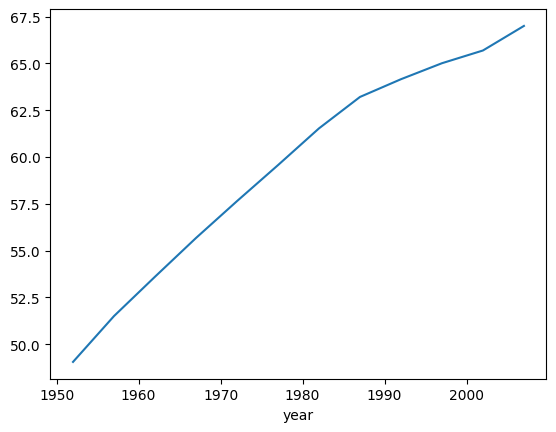

In [77]:
#VISUALIZAÇÃO
#.plot -> gráfico básico
EspecVida = df.groupby('year')['lifeExp'].mean()
print(EspecVida)
EspecVida.plot()